In [2]:
import itertools
from collections import Counter, defaultdict
import numpy as np
import re
from string import punctuation
import nltk
from nltk.corpus import stopwords
from pymorphy3 import MorphAnalyzer
morph = MorphAnalyzer()
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk.probability import FreqDist
from nltk.collocations import *
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [3]:
stops = stopwords.words('russian') + ['это', 'весь', 'мой', 'ваш', 'свой', 'мочь', 'всё', 'ещё']

def normalize(text):
    normalized_text = [morph.parse(token)[0].normal_form for token in word_tokenize(text.lower()) if len(token) > 2 and morph.parse(token)[0].normal_form not in stops]  
    return normalized_text

In [4]:
path = 'C:\\Users\\Диана\\Desktop\\Профпереподготовка\\Программирование\\Проект\\Mantel_trilogy.txt'
with open(path, encoding='utf-8') as txt:
    corpus = txt.read()
    corpus = re.sub(r'\n', ' ', corpus)
    corpus = re.sub(r'[a-zA-Z…]',  '', corpus)
    corpus_sent = sent_tokenize(corpus) # предложения
    corpus_sent_clean = [] # для чистых предложений
    for sent in corpus_sent: # цикл по каждому предложению
        corpus_sent_clean.append(' '.join(normalize(sent))) #предобработка

In [5]:
corpus_clean = ' '.join(corpus_sent_clean)

In [42]:
corpus_clean[:500]

'хилари мантела действовать лицо патнуть 1500 уолтер кромвель пивовар кузнец томас сын бета дочь кэт дочь морган уильямс муж кэт остин-фрайарза 1527 томас кромвель стряпчий лиз уайкиса жена грегори сын энн дочь грейс дочь генри уайкиса отец лиз суконщик мерси жена джоанна уильямсон сестра лиз джон уильямсон муж джоанна джо дочь алиса уэллифед племянница кромвелеть дочь бета кромвель ричард уильямс поздний кромвель сын кэт морган рейф сэдлера старший письмоводитель кромвелеть воспитанный остин-фра'

In [35]:
text_tokens = word_tokenize(corpus_clean)
word_frequencies = FreqDist(text_tokens)
print(word_frequencies)
word_frequencies.most_common(20)

<FreqDist with 22431 samples and 306193 outcomes>


[('говорить', 4658),
 ('король', 3913),
 ('знать', 1734),
 ('который', 1724),
 ('генрих', 1632),
 ('думать', 1606),
 ('сказать', 1514),
 ('рука', 1301),
 ('хотеть', 1096),
 ('кромвель', 1086),
 ('человек', 1026),
 ('видеть', 995),
 ('анна', 968),
 ('кардинал', 930),
 ('год', 909),
 ('глаз', 890),
 ('день', 887),
 ('однако', 887),
 ('королева', 862),
 ('время', 850)]

<Axes: title={'center': '10 самых частотных слов в книгах Хилари Мантел'}, xlabel='Samples', ylabel='Counts'>

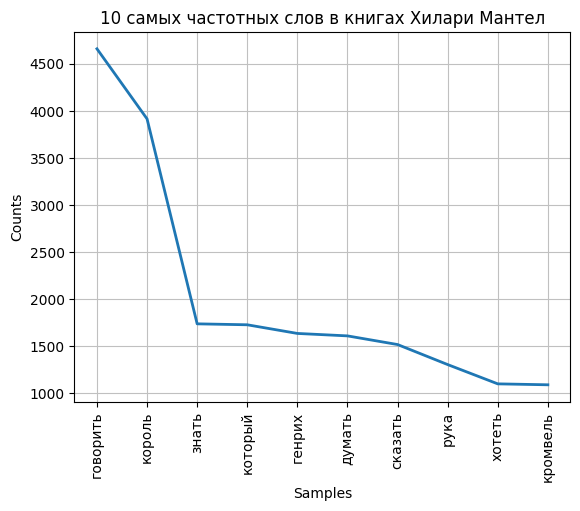

In [7]:
word_frequencies.plot(10, title='10 самых частотных слов в книгах Хилари Мантел')

In [8]:
count = 0
for i in corpus_clean.split():
    if i == 'кромвель':
        count += 1
print(count)
total_words = len(corpus_clean.split())
print(total_words)
kromwel_otn = (count / total_words) * 100
print(kromwel_otn)

1086
306192
0.3546794168364948


In [9]:
uniq = len(set(corpus_clean))
ttr = (uniq / total_words) * 100
print(ttr)

0.021555102680670953


БИГРАММЫ

In [10]:
def ngrammer(tokens, n=2):
    ngrams = []
    tokens_cl = [token for token in word_tokenize(tokens.lower()) if token not in stops]
    for i in range(0, len(tokens_cl)-n+1):
        ngrams.append(tuple(tokens_cl[i:i+n]))
    return ngrams

In [11]:
word_counter = Counter()

for sent in corpus_sent_clean:
    word_counter.update(ngrammer(sent, n=2))
word_counter.most_common(15)

[(('говорить', 'король'), 173),
 (('лорд', 'кромвель'), 156),
 (('мастер', 'ризлить'), 150),
 (('леди', 'мария'), 141),
 (('друг', 'друг'), 134),
 (('анна', 'болейн'), 115),
 (('господин', 'секретарь'), 115),
 (('крайний', 'мера'), 110),
 (('томас', 'мор'), 107),
 (('мастер', 'кромвель'), 105),
 (('говорить', 'генрих'), 105),
 (('томас', 'кромвель'), 104),
 (('поднимать', 'глаз'), 99),
 (('король', 'говорить'), 94),
 (('леди', 'рочфорд'), 90)]

In [9]:
type(word_counter)

collections.Counter

In [6]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
finder_big = BigramCollocationFinder.from_words(word_tokenize(corpus_clean))
finder_big

In [7]:
scores_lhr = finder_big.score_ngrams(bigram_measures.likelihood_ratio)
scores_t = finder_big.score_ngrams(bigram_measures.student_t)
scores_pmi = finder_big.score_ngrams(bigram_measures.pmi)

In [8]:
rank_lhr = []
counter = 1
for colloc in scores_lhr:
    rank_lhr.append((colloc[0], counter))
    counter += 1

rank_stu = []
counter = 1
for colloc in scores_t:
    rank_stu.append((colloc[0], counter))
    counter += 1

rank_pmi = []
counter = 1
for colloc in scores_pmi:
    rank_pmi.append((colloc[0], counter))
    counter += 1

rank_lhr[:20]

[(('крайний', 'мера'), 1),
 (('мастер', 'ризлить'), 2),
 (('господин', 'секретарь'), 3),
 (('гарри', 'перси'), 4),
 (('лорд', 'кромвель'), 5),
 (('леди', 'мария'), 6),
 (('сей', 'пора'), 7),
 (('друг', 'друг'), 8),
 (('анна', 'болейн'), 9),
 (('чарльз', 'брэндон'), 10),
 (('хранитель', 'малый'), 11),
 (('леди', 'рочфорд'), 12),
 (('томас', 'мор'), 13),
 (('поднимать', 'глаз'), 14),
 (('эдвард', 'сеймур'), 15),
 (('пожимать', 'плечо'), 16),
 (('фрэнсис', 'брайан'), 17),
 (('ричард', 'рич'), 18),
 (('мастер', 'кромвель'), 19),
 (('подаваться', 'вперёд'), 20)]

In [15]:
all_ranks = [rank_lhr, rank_stu, rank_pmi]
sum_of_ranks = {}
for bigs_ranks in all_ranks:
    bigs, ranks = zip(*bigs_ranks) #звездочка разделяет кортежи
    for index in range(len(ranks)):
        if bigs[index] not in sum_of_ranks:
            sum_of_ranks[bigs[index]] = 0
        sum_of_ranks[bigs[index]] += ranks[index]

sum_of_ranks

{('крайний', 'мера'): 34437,
 ('мастер', 'ризлить'): 94141,
 ('господин', 'секретарь'): 68766,
 ('гарри', 'перси'): 45482,
 ('лорд', 'кромвель'): 130500,
 ('леди', 'мария'): 122355,
 ('сей', 'пора'): 57313,
 ('друг', 'друг'): 123287,
 ('анна', 'болейн'): 115957,
 ('чарльз', 'брэндон'): 48641,
 ('хранитель', 'малый'): 48964,
 ('леди', 'рочфорд'): 96472,
 ('томас', 'мор'): 121167,
 ('поднимать', 'глаз'): 113509,
 ('эдвард', 'сеймур'): 71631,
 ('пожимать', 'плечо'): 50296,
 ('фрэнсис', 'брайан'): 49333,
 ('ричард', 'рич'): 108034,
 ('мастер', 'кромвель'): 136484,
 ('подаваться', 'вперёд'): 30355,
 ('год', 'назад'): 112334,
 ('лорд', 'хранитель'): 89358,
 ('джейн', 'рочфорд'): 100634,
 ('николас', 'кэрье'): 37161,
 ('томас', 'кромвель'): 159862,
 ('каждый', 'день'): 138724,
 ('иметь', 'вид'): 82607,
 ('государственный', 'секретарь'): 57960,
 ('дик', 'персера'): 17098,
 ('мэри', 'шелтон'): 55793,
 ('гарри', 'норрис'): 84447,
 ('томас', 'говард'): 113216,
 ('маргарет', 'поль'): 51350,
 ('пал

In [16]:
sorted_list = list(sum_of_ranks.items())
sorted(sorted_list, key=lambda sorted_list: sorted_list[1], reverse=False)

[(('вымышленный', 'персонаж'), 4712),
 (('выворачивать', 'наизнанку'), 4958),
 (('мона', 'шер'), 4986),
 (('боро', 'боромбетта'), 5022),
 (('денно', 'нощно'), 5084),
 (('замочный', 'скважина'), 5111),
 (('моровой', 'поветрие'), 5133),
 (('творожный', 'суфле'), 5368),
 (('хилари', 'мантела'), 5414),
 (('целость', 'сохранность'), 5425),
 (('дон', 'диего'), 5529),
 (('иоанн', 'креститель'), 5628),
 (('латный', 'рукавица'), 5850),
 (('виноградный', 'лоза'), 6104),
 (('крестовый', 'поход'), 6151),
 (('задом', 'наперёд'), 6450),
 (('направо', 'налево'), 6496),
 (('потолочный', 'балка'), 6510),
 (('теннисный', 'корт'), 6746),
 (('выкидывать', 'коленце'), 6862),
 (('пасынок', 'падчерица'), 7117),
 (('схватывать', 'лёт'), 7248),
 (('перочинный', 'ножик'), 7604),
 (('верховой', 'езда'), 8087),
 (('архангел', 'михаил'), 8103),
 (('стог', 'сено'), 8106),
 (('генеральный', 'атторный'), 8312),
 (('булла', 'отлучение'), 8479),
 (('терновый', 'венец'), 8483),
 (('робин', 'гуд'), 8490),
 (('антуан', 'к

Частеречная разметка и поиск конкретики

In [17]:
text = corpus_clean
tagged_tuples = ['_'.join((str(morph.parse(token)[0].normal_form), str(morph.parse(token)[0].tag.POS))) for token in word_tokenize(text)]
tagged_text = ' '.join(tagged_tuples)

In [18]:
finder_big = BigramCollocationFinder.from_words(word_tokenize(tagged_text))
scores_student_t = finder_big.score_ngrams(bigram_measures.student_t)

In [19]:
bigrams_with_krom = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'кромвель', bigram_measured[0][1]) or re.match(r'кромвель', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_krom.append(bigram_measured)
print(bigrams_with_krom[:20])

[(('лорд_NOUN', 'кромвель_NOUN'), 12.32784919895449), (('мастер_NOUN', 'кромвель_NOUN'), 10.090845893173752), (('томас_NOUN', 'кромвель_NOUN'), 9.907633837477354), (('ричард_NOUN', 'кромвель_NOUN'), 7.226429126056667), (('милорд_NOUN', 'кромвель_NOUN'), 4.680279575378781), (('кромвель_NOUN', 'говорить_INFN'), 4.445831725249256), (('говорить_INFN', 'кромвель_NOUN'), 3.8229910606307667), (('энн_NOUN', 'кромвель_NOUN'), 3.5061975251771433), (('кромвель_NOUN', 'думать_INFN'), 3.052116449834453), (('кромвель_NOUN', 'знать_INFN'), 2.793043265215305), (('кромвель_NOUN', 'стоить_INFN'), 2.7562616698951476), (('грегори_NOUN', 'кромвель_NOUN'), 2.723110462080895), (('кромвель_NOUN', 'писать_INFN'), 2.608671654805956), (('кромвель_NOUN', 'считать_INFN'), 2.570839307234326), (('кромвель_NOUN', 'вставать_INFN'), 2.5638379759384566), (('кромвель_NOUN', 'почему_ADVB'), 2.3995669878161197), (('кромвель_NOUN', 'брать_INFN'), 2.3401041302574894), (('кромвель_NOUN', 'видеть_INFN'), 2.252576580205612), ((

In [24]:
bigrams_with_adj = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][1]) and re.match(r'\w+_ADJ', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj.append(bigram_measured)
print(bigrams_with_adj[:100])

[(('дражайший_ADJF', 'кромвель_NOUN'), 1.381610160150341), (('выпуклый_ADJF', 'кромвель_NOUN'), 0.9964532174151597), (('реальный_ADJF', 'кромвель_NOUN'), 0.9858128696606389), (('мутный_ADJF', 'кромвель_NOUN'), 0.9822660870757985), (('тягостный_ADJF', 'кромвель_NOUN'), 0.9787193044909583), (('бессердечный_ADJF', 'кромвель_NOUN'), 0.975172521906118), (('господень_ADJF', 'кромвель_NOUN'), 0.9716257393212777), (('невиновный_ADJF', 'кромвель_NOUN'), 0.9716257393212777), (('усопший_ADJF', 'кромвель_NOUN'), 0.9538918263970764), (('ангельский_ADJF', 'кромвель_NOUN'), 0.9503450438122361), (('христов_ADJF', 'кромвель_NOUN'), 0.8687690443609096), (('быстрый_ADJF', 'кромвель_NOUN'), 0.8084737404186249), (('каковой_ADJF', 'кромвель_NOUN'), 0.797833392664104), (('согласный_ADJF', 'кромвель_NOUN'), 0.7765526971550624), (('тяжёлый_ADJF', 'кромвель_NOUN'), 0.7659123494005415), (('родный_ADJF', 'кромвель_NOUN'), 0.7588187842308609), (('подобный_ADJF', 'кромвель_NOUN'), 0.7410848713066596), (('поздний_AD

In [25]:
bigrams_with_adj2 = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\кромвель', bigram_measured[0][0]) and re.match(r'\w+_ADJ', bigram_measured[0][1]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_adj2.append(bigram_measured)
print(bigrams_with_adj2[:100])

[(('кромвель_NOUN', 'следующий_ADJF'), 1.9077309133096167), (('кромвель_NOUN', 'должный_ADJF'), 1.6229057016092474), (('кромвель_NOUN', 'дурной_ADJF'), 1.576422880680167), (('кромвель_NOUN', 'большой_ADJF'), 1.4764552959009716), (('кромвель_NOUN', 'уимблдонский_ADJF'), 1.4016737922874205), (('кромвель_NOUN', 'таковой_ADJF'), 1.2938317695506192), (('кромвель_NOUN', 'добрый_ADJF'), 1.2016872146191928), (('кромвель_NOUN', 'государственный_ADJF'), 1.1884977008309527), (('кромвель_NOUN', 'готовый_ADJF'), 1.0481070236105967), (('кромвель_NOUN', 'всякий_ADJF'), 1.0405284138199928), (('кромвель_NOUN', 'непостигаемый_ADJF'), 0.9964532174151597), (('кромвель_NOUN', 'неотразимый_ADJF'), 0.9929064348303195), (('кромвель_NOUN', 'непочтительный_ADJF'), 0.9929064348303195), (('кромвель_NOUN', 'застывший_ADJF'), 0.9893596522454792), (('кромвель_NOUN', 'конфиденциальный_ADJF'), 0.9893596522454792), (('кромвель_NOUN', 'причудливый_ADJF'), 0.9858128696606389), (('кромвель_NOUN', 'крепенький_ADJF'), 0.982

In [22]:
bigrams_with_nouns = []
for bigram_measured in scores_student_t:
    #print(bigram_measured)
    #print(bigram_measured[0][0])
    if re.match(r'\w+_INFN', bigram_measured[0][1]) and re.match(r'\кромвель', bigram_measured[0][0]):
        # с падежами например \w+_NOUN_gen, с конкретным словом например r'друг'
        #print(bigram_measured[0][0])
        #print(bigram_measured)
        bigrams_with_nouns.append(bigram_measured)
print(bigrams_with_nouns[:30])

[(('кромвель_NOUN', 'говорить_INFN'), 4.445831725249256), (('кромвель_NOUN', 'думать_INFN'), 3.052116449834453), (('кромвель_NOUN', 'знать_INFN'), 2.793043265215305), (('кромвель_NOUN', 'стоить_INFN'), 2.7562616698951476), (('кромвель_NOUN', 'писать_INFN'), 2.608671654805956), (('кромвель_NOUN', 'считать_INFN'), 2.570839307234326), (('кромвель_NOUN', 'вставать_INFN'), 2.5638379759384566), (('кромвель_NOUN', 'брать_INFN'), 2.3401041302574894), (('кромвель_NOUN', 'видеть_INFN'), 2.252576580205612), (('кромвель_NOUN', 'идти_INFN'), 2.014348582292026), (('кромвель_NOUN', 'кричать_INFN'), 1.9870393829207698), (('кромвель_NOUN', 'протягивать_INFN'), 1.8563553053139685), (('кромвель_NOUN', 'поднимать_INFN'), 1.7919405476773336), (('кромвель_NOUN', 'звать_INFN'), 1.721577567090038), (('кромвель_NOUN', 'смотреть_INFN'), 1.6805496874632182), (('кромвель_NOUN', 'вспоминать_INFN'), 1.6790161760719546), (('кромвель_NOUN', 'уверить_INFN'), 1.6480936364841783), (('кромвель_NOUN', 'хохотать_INFN'), 1.

In [28]:
finder_big_win = BigramCollocationFinder.from_words(word_tokenize(corpus_clean), window_size=4)

In [29]:
scores_tscore_no_win = finder_big.score_ngrams(bigram_measures.student_t)
scores_tscore_win = finder_big_win.score_ngrams(bigram_measures.student_t)
print(scores_tscore_no_win[:10])

[(('лорд_NOUN', 'кромвель_NOUN'), 12.32784919895449), (('мастер_NOUN', 'ризлить_INFN'), 12.189842256589552), (('леди_NOUN', 'мария_NOUN'), 11.750017323859108), (('друг_NOUN', 'друг_NOUN'), 11.579071027574663), (('господин_NOUN', 'секретарь_NOUN'), 10.700782375889387), (('анна_NOUN', 'болейн_NOUN'), 10.629763293559748), (('крайний_ADJF', 'мера_NOUN'), 10.482483413458146), (('томас_NOUN', 'мор_NOUN'), 10.287341097107818), (('мастер_NOUN', 'кромвель_NOUN'), 10.090845893173752), (('томас_NOUN', 'кромвель_NOUN'), 9.907633837477354)]


In [30]:
print(scores_tscore_win[:20])

[(('мастер', 'ризлить'), 6.9951525109306525), (('лорд', 'кромвель'), 6.978117030571099), (('леди', 'мария'), 6.9586808658106), (('друг', 'друг'), 6.814415993365793), (('хранитель', 'печать'), 6.205324031829535), (('господин', 'секретарь'), 6.151515008440216), (('анна', 'болейн'), 6.110827625766565), (('крайний', 'мера'), 6.045592445217576), (('томас', 'мор'), 5.959582687288871), (('поднимать', 'глаз'), 5.807266856021775), (('мастер', 'кромвель'), 5.79113563649208), (('томас', 'кромвель'), 5.566214599831515), (('леди', 'рочфорд'), 5.516525236826148), (('год', 'назад'), 5.484653275241134), (('ричард', 'рич'), 5.454583453283853), (('гарри', 'перси'), 5.432474357143575), (('сей', 'пора'), 5.331228066611209), (('каждый', 'день'), 5.289270817138014), (('эдвард', 'сеймур'), 5.065544503756303), (('чарльз', 'брэндон'), 4.918507997482815)]
